# Importando Bibliotecas:

In [ ]:
# Dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico Dinâmico
import plotly.express as px

# Categorizar
from sklearn.preprocessing import LabelEncoder

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Métricas:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Display
pd.set_option('display.max_columns', None)

# Importando Dataset:

In [ ]:
df_mus = pd.read_csv('musicas.csv')

# Entendendo o Dataset:

In [ ]:
df_mus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df_mus.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df_mus.describe().round(2)

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,56999.50,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,32909.11,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28499.75,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
50%,56999.50,35.00,212906.00,0.58,0.68,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,85499.25,50.00,261506.00,0.70,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,113999.00,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


## Dados Duplicados:

In [ ]:
# Verificando Dados Duplicados:

dado_dupli = df_mus.duplicated('track_id').sum()
dado_dupli

24259

In [ ]:
# Retirando Dados Duplicados:

df_mus.drop_duplicates('track_id', inplace=True)

## Dados Faltantes:

In [ ]:
print("Dados Faltantes:\n",df_mus.isna().sum())

Dados Faltantes:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
# Retirando Dados Faltantes:

df_mus.dropna(inplace=True)

### Retirando Features Desnecessárias:

In [ ]:
df_mus.drop(columns=["Unnamed: 0","track_id"], inplace=True)

## Relação entre Features:

Text(0, 0.5, 'Frequência')

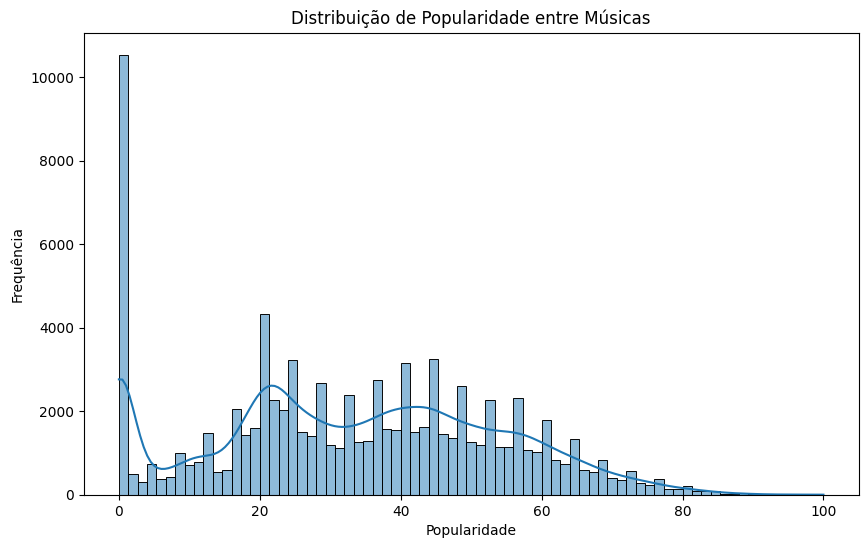

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_mus['popularity'], kde=True)
plt.title('Distribuição de Popularidade entre Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')

Text(0.5, 0, 'Energia')

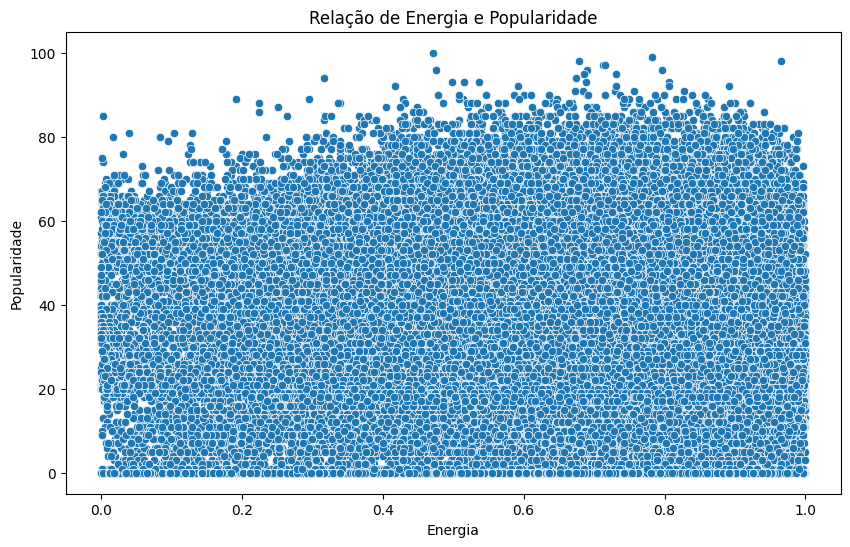

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='energy', y='popularity', data=df_mus)
plt.title('Relação de Energia e Popularidade')
plt.ylabel('Popularidade')
plt.xlabel('Energia')

(array([0, 1]), [Text(0, 0, 'Não Explícito'), Text(1, 0, 'Explícito')])

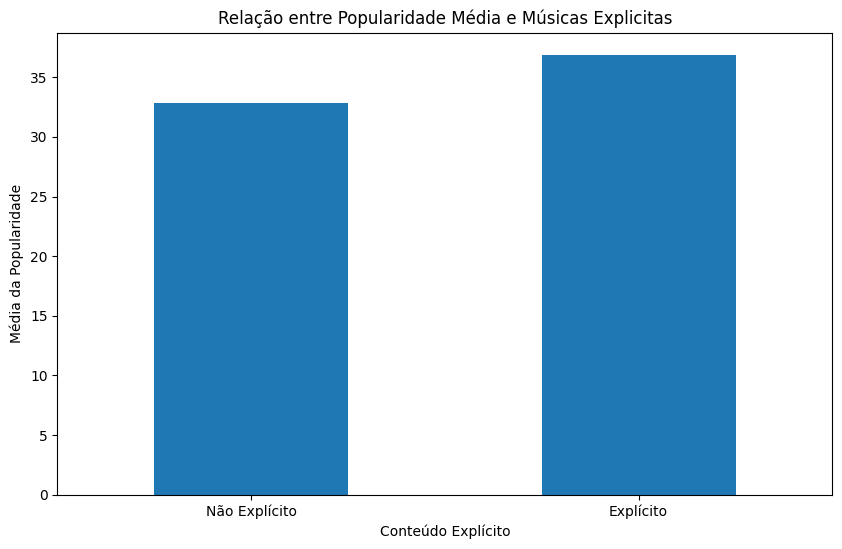

In [ ]:
expli = df_mus.groupby('explicit')['popularity'].mean()

plt.figure(figsize=(10,6))
expli.plot(kind='bar')
plt.title('Relação entre Popularidade Média e Músicas Explicitas')
plt.ylabel('Média da Popularidade')
plt.xlabel('Conteúdo Explícito')
plt.xticks([0,1], ['Não Explícito', 'Explícito'])
plt.xticks(rotation=0)

Text(0.5, 0, 'Variância')

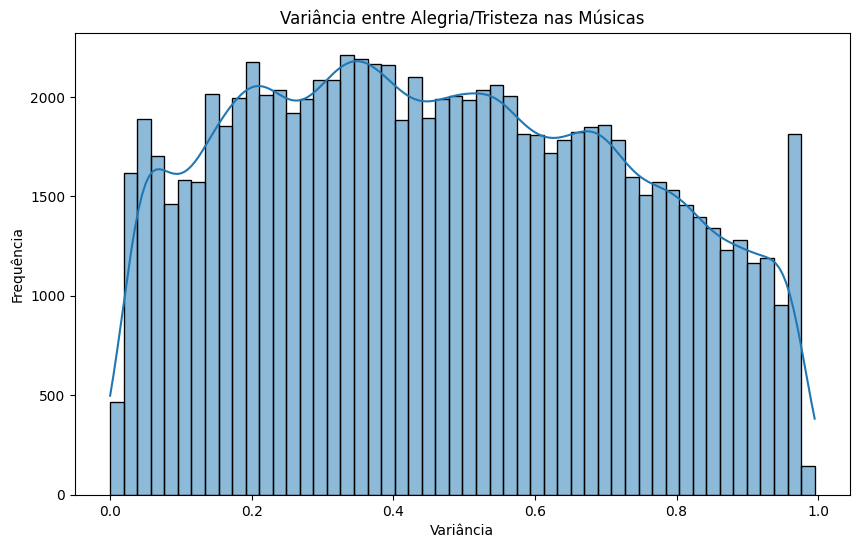

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_mus['valence'], kde=True)
plt.title('Variância entre Alegria/Tristeza nas Músicas')
plt.ylabel('Frequência')
plt.xlabel('Variância')

Text(0.5, 0, 'Gênero')

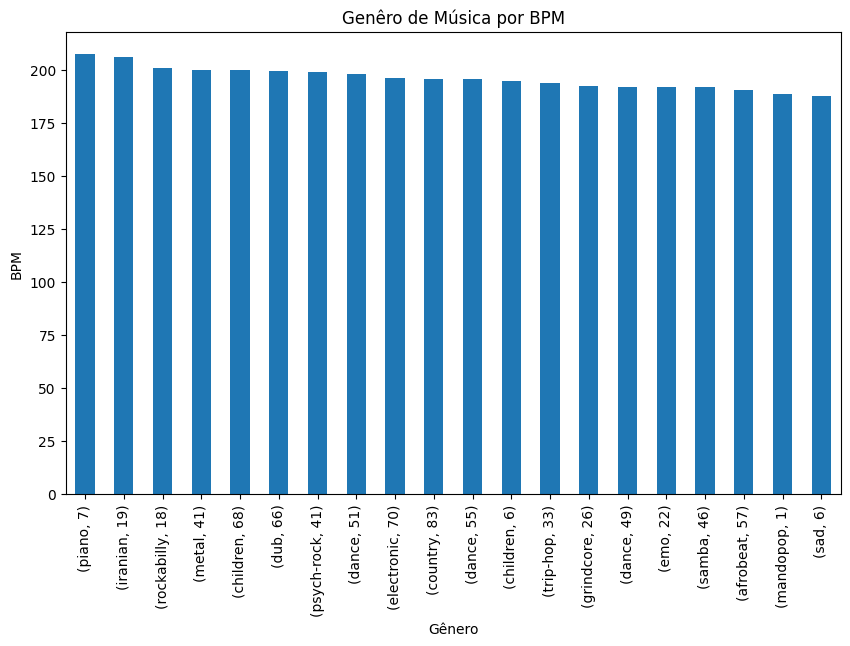

In [ ]:
gen_tempo = df_mus.groupby(by=['track_genre', 'popularity'])['tempo'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
gen_tempo.plot(kind='bar')
plt.title('Genêro de Música por BPM')
plt.ylabel('BPM')
plt.xlabel('Gênero')

Text(0.5, 0, 'Gênero')

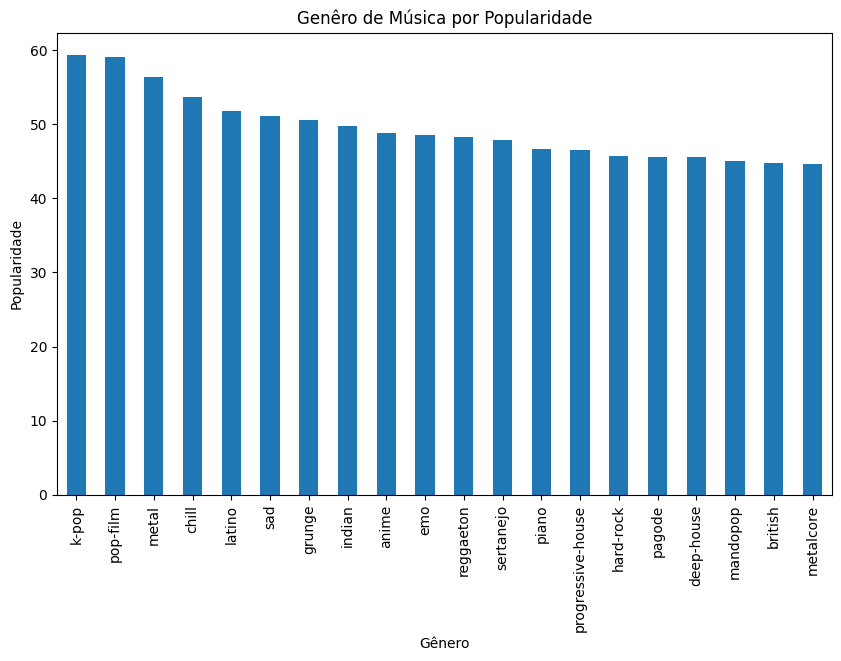

In [ ]:
gen_pop = df_mus.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
gen_pop.plot(kind='bar')
plt.title('Genêro de Música por Popularidade')
plt.ylabel('Popularidade')
plt.xlabel('Gênero')

Text(0.5, 1.0, 'Popularidade Média por Álbum do Metallica')

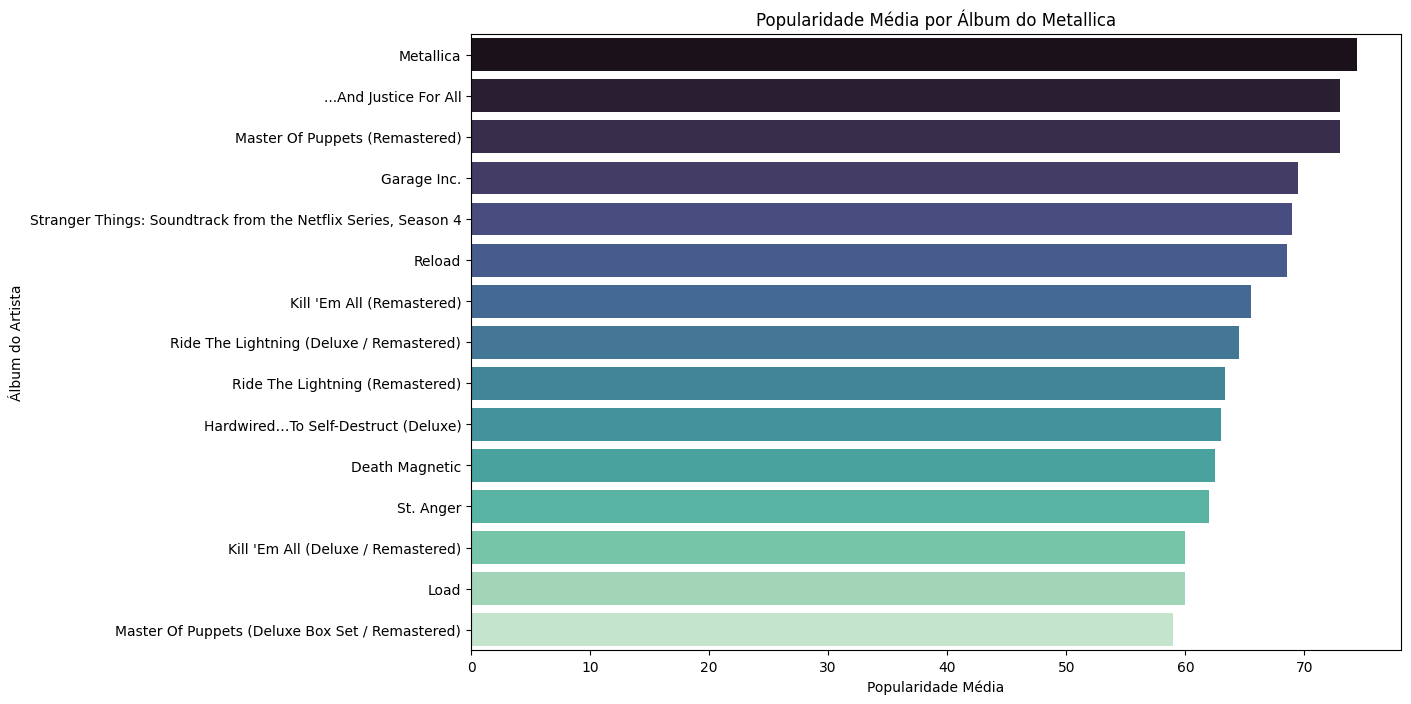

In [ ]:
artista = 'Metallica'

df_mich = df_mus[df_mus['artists'] == artista]

popu_album = df_mich.groupby('album_name')['popularity'].mean().reset_index()

popu_album = popu_album.sort_values(by='popularity', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='popularity', y='album_name', data=popu_album, palette='mako')
plt.xlabel('Popularidade Média')
plt.ylabel('Álbum do Artista')
plt.title('Popularidade Média por Álbum do Metallica')

## Duração da Música:

In [ ]:
df_mus['duration_min'] = (df_mus['duration_ms']/60000).round(2)
df_mus.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.84
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.49
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.51
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.37
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.31


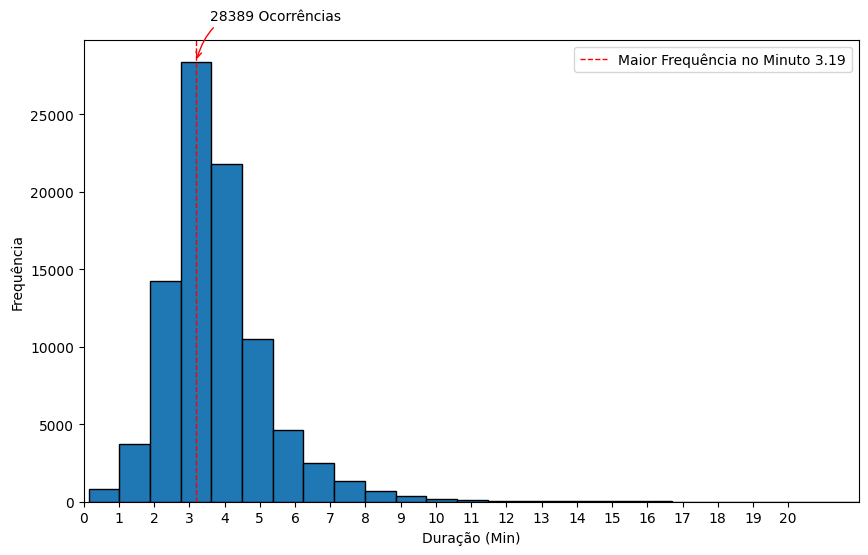

In [ ]:
plt.figure(figsize=(10,6))

counts, bin, patches = plt.hist(df_mus['duration_min'], bins=100, edgecolor='black')

max_count_index = np.argmax(counts)
max_count_value = counts[max_count_index]
maior_bin_inicio = bin[max_count_index]
maior_bin_final = bin[max_count_index + 1]

mid_point = (maior_bin_inicio + maior_bin_final)/2

plt.axvline(x=mid_point, color='red', label=f'Maior Frequência no Minuto {mid_point:.2f}',
            linestyle='dashed', linewidth=1)
plt.annotate(f'{max_count_value:.0f} Ocorrências',
             xy = (mid_point, max_count_value),
             xytext=(10,30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3, rad=0.5',
                             color='red'))
plt.xticks(np.arange(0,21,1))
plt.xlim(0,22)

plt.xlabel('Duração (Min)')
plt.ylabel('Frequência')

plt.legend()

In [ ]:
intervalos = np.arange(0, df_mus['duration_min'].max() + 5, 5)

df_mus['duration_inter'] = pd.cut(df_mus['duration_min'], bins=intervalos)

hist_df = df_mus['duration_inter'].value_counts().sort_index().reset_index()
hist_df.columns = ['Duração Intervalo (Min)', 'Frequência']

hist_df

,Duração Intervalo (Min),Frequência
0,"(0.0, 5.0]",76225
1,"(5.0, 10.0]",12967
2,"(10.0, 15.0]",409
3,"(15.0, 20.0]",66
4,"(20.0, 25.0]",28
5,"(25.0, 30.0]",11
6,"(30.0, 35.0]",5
7,"(35.0, 40.0]",3
8,"(40.0, 45.0]",3
9,"(45.0, 50.0]",6


## Separando Dados Categóricos:

In [ ]:
## Separando apenas dados numéricos

df_num = df_mus.select_dtypes(include=[np.number])

df_num

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,3.84
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,2.49
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,3.51
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,3.37
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,3.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,6.42
113996,22,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,6.42
113997,22,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,4.52
113998,41,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,4.73


### Gráfico de Correlação:

Text(0.5, 1.0, 'Correlação das Features')

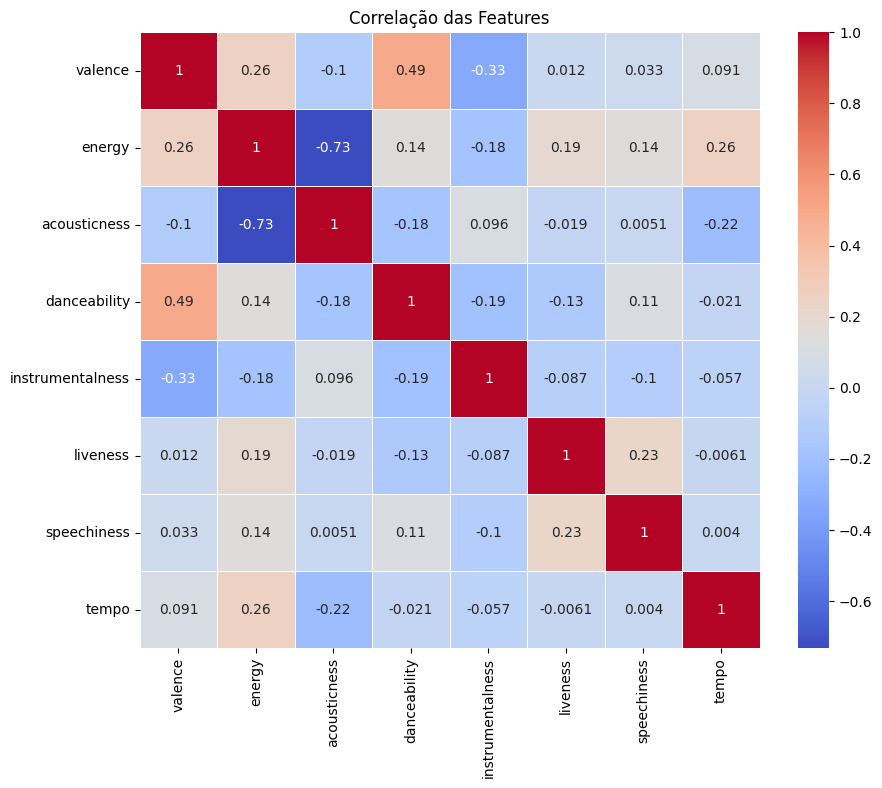

In [ ]:
carac_mus = df_num[['valence','energy',
                    'acousticness','danceability',
                    'instrumentalness','liveness',
                    'speechiness','tempo']]

corr = carac_mus.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlação das Features')

### Adicionando a Velocidade:

In [ ]:
def categoriza_tempo(coluna):
  if (coluna['tempo'] >= 120):
    return 'Rápido'
  else:
    return 'Normal'

df_mus['velocidade'] = df_mus.apply(categoriza_tempo, axis=1)

(array([0, 1]), [Text(0, 0, 'Rápido'), Text(1, 0, 'Normal')])

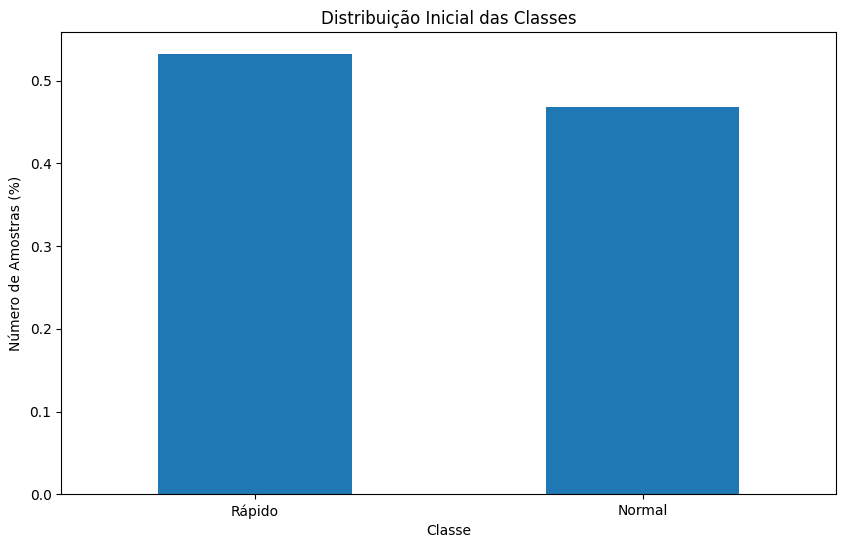

In [ ]:
classe_veloc = df_mus['velocidade'].value_counts(normalize=True)

plt.figure(figsize=(10,6))
classe_veloc.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Número de Amostras (%)')
plt.title('Distribuição Inicial das Classes')

plt.xticks(rotation=0)

In [ ]:
equi = df_mus['velocidade'].value_counts().round(2)
equi

,count
velocidade,
Rápido,47754
Normal,41986


# Criação do Modelo:

## Codificando Features Categóricas:

In [ ]:
df1 = df_mus.copy()

In [ ]:
def categoriza_numero(df, colunas_codificar):

  codificador = LabelEncoder()

  for colunas in colunas_codificar:
    if colunas in df.columns:
      df[colunas] = codificador.fit_transform(df[colunas])
    else:
      print('Não Possui Colunas')
  return df

colunas = ['artists','album_name',
           'track_name','explicit',
           'track_genre','velocidade',
           'duration_inter']

df_mod = categoriza_numero(df1,colunas)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           89740 non-null  int64  
 1   album_name        89740 non-null  int64  
 2   track_name        89740 non-null  int64  
 3   popularity        89740 non-null  int64  
 4   duration_ms       89740 non-null  int64  
 5   explicit          89740 non-null  int64  
 6   danceability      89740 non-null  float64
 7   energy            89740 non-null  float64
 8   key               89740 non-null  int64  
 9   loudness          89740 non-null  float64
 10  mode              89740 non-null  int64  
 11  speechiness       89740 non-null  float64
 12  acousticness      89740 non-null  float64
 13  instrumentalness  89740 non-null  float64
 14  liveness          89740 non-null  float64
 15  valence           89740 non-null  float64
 16  tempo             89740 non-null  float64
 1

## Treinando e Testando Modelo:

In [ ]:
x = df_mod[['popularity','duration_min','energy',
            'danceability','loudness','liveness',
            'acousticness','track_genre','instrumentalness']]

y = df_mod[['velocidade']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
modelo_arvore = RandomForestClassifier(bootstrap=True, n_estimators=500)

In [ ]:
modelo_arvore.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
# Verificando os Hiperparâmetros

predicao_arvore = modelo_arvore.predict(x_test)
print(classification_report(y_test, predicao_arvore))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      8397
           1       0.70      0.70      0.70      9551

    accuracy                           0.68     17948
   macro avg       0.68      0.68      0.68     17948
weighted avg       0.68      0.68      0.68     17948



<Axes: >

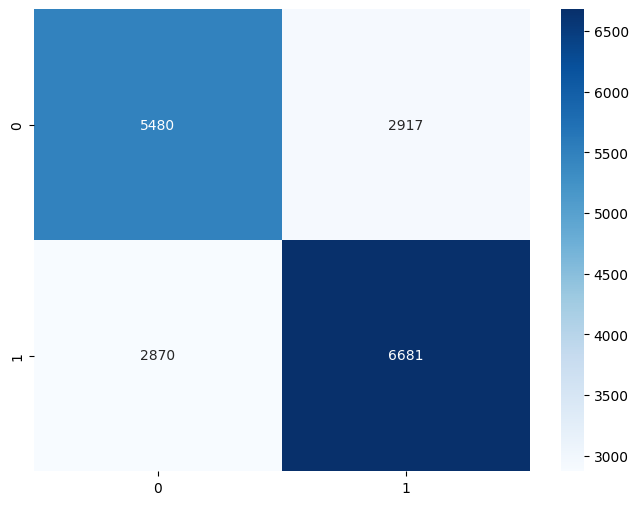

In [ ]:
matriz_confusao = confusion_matrix(y_test, predicao_arvore)

plt.figure(figsize=(8,6))
sns.heatmap(matriz_confusao, annot=True, cbar=True, fmt='d', cmap='Blues')

## Modelo:

In [ ]:
y_pred = modelo_arvore.predict(x_test)

def prever_velocidade(nova_musica):

    nova_musica = nova_musica[x.columns]
    predicao = modelo_arvore.predict(nova_musica)
    return 'agitada' if predicao[0] == 1 else 'lenta'


nova_musica = pd.DataFrame({
    'popularity': [70],
    'duration_min': [3.30],
    'danceability': [0.8],
    'energy': [0.7],
    'loudness': [-5.0],
    'acousticness': [0.1],
    'instrumentalness': [0.0],
    'liveness': [0.2],
    'track_genre': [1],
    'track_name': [11741]
})

resultado = prever_velocidade(nova_musica)
print("A música é:", resultado)

A música é: lenta
